#### Notebook to fine tune XGBM Model iteratively  

**This notebook predicts Los Range given patient demographics, primay Diagnosis, Diagnosis category and comorbidities**  
  

### Step 1: Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import time

from pathlib import Path
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 12

### Step 2: Load the data file

In [16]:
rawdata = pd.read_csv('data/NVtoDTDRange8.csv', index_col=[0])

data = rawdata.copy()

### Step 3 Preprocess the data for the model 

In [17]:
#Drop text column DiagDesc 
data.drop(columns='DiagDesc', inplace=True)

#encode categorical columns
CatgCols = ['Gender', 'Ethinicity', 'Religion', 'MaritalStatus',
       'DiagnosisCategory', 'PrimaryDiag', 'DiagGroup']

le = preprocessing.LabelEncoder()
data[CatgCols].values.flatten()
le.fit(data[CatgCols].values.flatten().astype(str))
data[CatgCols] = le.transform(data[CatgCols].values.flatten().astype(str)).reshape(data[CatgCols].shape)

# encode predictor variable
lep = preprocessing.LabelEncoder()
lep.fit(data.LosRange)
lep_dict = dict(zip(lep.classes_, lep.transform(lep.classes_)))
print(lep_dict)
data.LosRange = lep.transform(data.LosRange)



{'0:<7': 0, '1:7-14': 1, '2:15-21': 2, '3:22-30': 3, '4:31-60': 4, '5:61-120': 5, '6:121-180': 6, '7:180+': 7}


**Choose target and unused columns in the dataset**  
Filter out columns/rows if chosing to build model for a specific group/category of observations

In [18]:
target='LosRange'
## Ignore the following columns
NonFeatureCols =['LosRange','EntitySys','TotalLos','DiagDesc', 'DTDsinceVD',
                 'AdmitMonth']   # always include predictor
featureList = [x for x in data.columns if x not in NonFeatureCols]

### Step 4 Split Train and Test Data sets for validating the model

**Deal with missing values in train and test**

In [19]:
# Create matrices and dataframes for train/test
X = data[featureList]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_X = my_imputer.fit_transform(X_train)
test_X = my_imputer.transform(X_test)
#dtrain = my_imputer.fit_transform(dtrain)
#dtest = my_imputer.transform(dtrain)

### Experiment Cell start here.  
Modify the parameters for each run and document the results. 

**Change parameters and run to record results**

In [33]:
lgbm = lgb.LGBMClassifier(
    n_estimators=60,           # num_boosting_rounds passed to fit function
    learning_rate = 0.2,
    # general parameters
    max_depth= 10,              # default=6 (3-10) lower  underfits
    boosting_type = 'gbdt',
    colsample_bytree = 1.0,       # cols to sample for each tree
    importance_type = 'gain',
    min_child_samples = 30,
    min_split_gain = 0.1,
    n_jobs = -1,
    subsample_freq = 40,
    verbosity= 0,              # 0:silent 1: Info 2: Warn 3: debug
    num_leaves = 50,           # maximum number of leaves 
    silent= 'warn',
    #booster parameters
    min_child_weight= 0.01,   ## default=1        higher underfits Train and test consistently.
    max_delta_step= 0,       # 0 is disabled, upper limit for wt neeeded to split the tree
    subsample= 1,             # sample observations for each tree 1 means all
    subsample_for_bin = 200000, # sample observations for node
    reg_lambda=1,              # L2 regularization evenly reduce of wts
    reg_alpha=0,               # L1 regularization eliminate weights randomly 
    # learning parameters
    objective= 'multiclass',  # multi:softmax for classes  
    seed= 77                  # reproducible for parameter tuning. 
)

start_time = time.time()
# train
# train
lgbm.fit(X_train, y_train)

elapsed = time.time() - start_time
print('Model Fit Time %s\n\n' % time.strftime("%Hh:%Mm:%Ss", time.gmtime(elapsed)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=77)
n_scores = cross_val_score(lgbm, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.655 (0.015)


Training Results
Accuracy: 99.99%
Precision: 0.99986
Recall: 0.99985
Training Confusion Matrix
[[1554    0    0    0    0    0    0    0]
 [   0  819    0    0    0    1    0    0]
 [   0    0  425    0    0    0    0    0]
 [   0    0    0  422    0    0    0    0]
 [   0    0    0    0  870    0    0    0]
 [   0    0    0    0    0  904    0    0]
 [   0    0    0    0    0    0  412    0]
 [   0    0    0    0    0    0    0 1472]]
Test Results
Accuracy: 61.94%
Precision: 0.63978
Recall: 0.53937
Test Confusion Matrix
[[425  27   3   5  22  16   1   9]
 [ 52 139   2   3  14  18   1  20]
 [ 32  13  57   4  19   9   1  14]
 [ 23  18   2  56  23   9   7  17]
 [ 32  18   1   3 157  43   2  34]
 [ 16  17   4   2  45 149   4  52]
 [ 15   3   0   4  23  21  56  46]
 [ 23  10   4   5  32  28   2 382]]


{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'gain',
 'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_samples': 30,
 'min_child_weight': 0.01,
 'min_split_gain': 0.1,
 'n_estimators': 60,
 'n_jobs': -1,
 'num_leaves': 50,
 'objective': 'multiclass',
 'random_state': None,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'silent': 'warn',
 'subsample': 1,
 'subsample_for_bin': 200000,
 'subsample_freq': 40,
 'verbosity': 0,
 'max_delta_step': 0,
 'seed': 77}

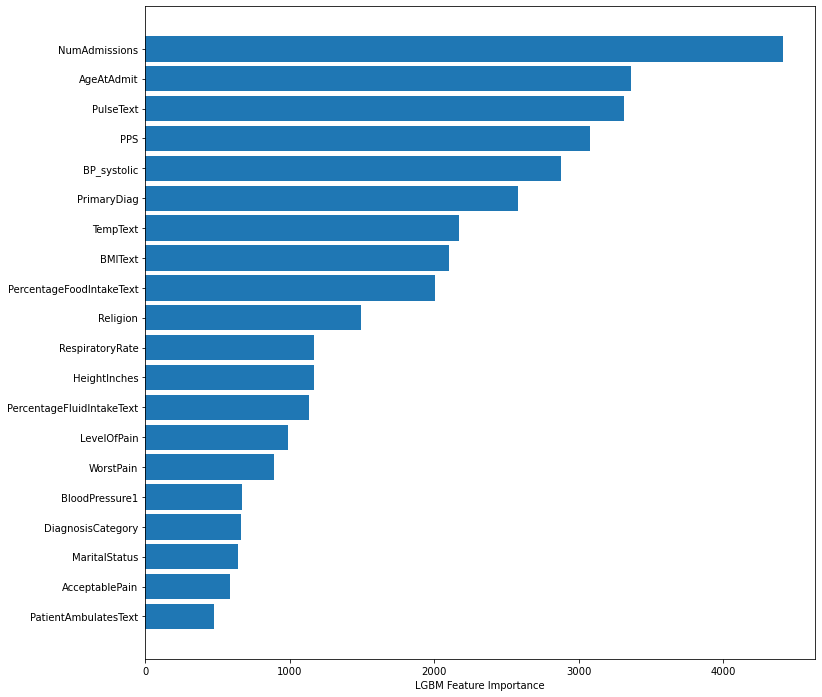

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# predict
y_hat = lgbm.predict(X_train, num_iteration=lgbm.best_iteration_)
# eval
print("Training Results")
print("Accuracy: %.2f%%" % (accuracy_score(y_train, y_hat) * 100.0))
print('Precision: %0.5f' % precision_score(y_train, y_hat, average='macro'))
print('Recall: %0.5f'    % recall_score(y_train, y_hat, average='macro'))

# feature importances
print("Training Confusion Matrix")
cfm = metrics.confusion_matrix(y_train, y_hat)
print(cfm)

print("Test Results")
y_pred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration_)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))
print('Precision: %0.5f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %0.5f'    % recall_score(y_test, y_pred, average='macro'))

print("Test Confusion Matrix")

cfm = metrics.confusion_matrix(y_test, y_pred)
print(cfm)

sorted_idx = lgbm.feature_importances_.argsort()
plt.barh(np.array(featureList)[sorted_idx][-20:], lgbm.feature_importances_[sorted_idx][-20:],
         height=0.85, align='center')
plt.xlabel("LGBM Feature Importance")

lgbm.get_params()

In [36]:
## Model Performance in how close predictions are to actual LOS
## Model Performance in how close predictions are to actual LOS
XX=data.groupby('LosRange', as_index=False)['TotalLos'].mean()
los_class_mean_map = dict(zip(XX.LosRange, XX.TotalLos))

los = y_test.values
pred = lgbm.predict(X_test[featureList])
pred_los = pd.Series(pred).map(los_class_mean_map).values
los_deviance = pd.Series(y_test).map(los_class_mean_map).values
diffs1 = abs(los-pred_los).round(0).astype(int)
diffs2 = abs(los_deviance-pred_los).round(0).astype(int)

bins =  [-1,   7,      14,           30,          60,        90,         120,        np.inf]
names = ['a:+/-7','b:+/-14',   'c:+/-30',   'd:+/-60',   'e:+/-90', 'f:+/-120',   'g:+180']

#print(pd.cut(abs(diffs1), bins, labels=names).value_counts())
print(pd.cut(abs(diffs2), bins, labels=names).value_counts())


a:+/-7      1515
b:+/-14       41
c:+/-30       95
d:+/-60      174
e:+/-90      116
f:+/-120      25
g:+180       328
dtype: int64


In [12]:
y_pred

array([7, 7, 0, ..., 5, 7, 5])